In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from data_processing.read_features_1 import read_data
from matplotlib import pyplot

In [2]:
df= read_data('data_processing/processed/rodinia_2.0-ft/bfs-rodinia-2.0-ft.log')
df=df.drop(['kid','wb_id'],axis=1)

In [14]:
import wandb

In [4]:
# Fetch model
output= df[['fetch_lat']]
inp= df.drop(['issue_lat','execution_lat','fetch_lat'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(inp, output, random_state=42, test_size=0.1)
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(X_train, y_train)

/Users/santosh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(learning_rate=0.01, min_samples_split=5,
                          n_estimators=1000)

In [5]:
# Print Coefficient of determination R^2
mse = mean_squared_error(y_test, gbr.predict(X_test))
print("MSE error: %.3f "%mse)
print("Model Accuracy: %.3f" % gbr.score(X_test, y_test))
feature_importance = gbr.feature_importances_

MSE error: 1605.622 
Model Accuracy: 0.184


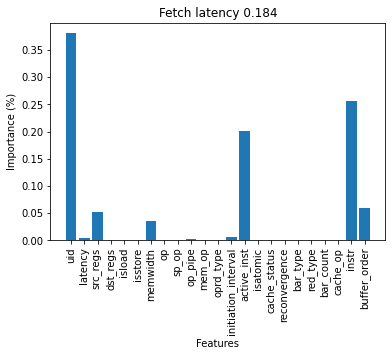

In [6]:
pyplot.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
columns= list(X_train)
pyplot.xlabel('Features')
pyplot.ylabel('Importance (%)')
pyplot.title('Fetch latency %.3f'% gbr.score(X_test, y_test))
pyplot.xticks([i for i in range(0,inp.shape[1])],columns)
pyplot.xticks(rotation=90)
pyplot.show()

# Issue model

In [7]:
output= df[['issue_lat']]
inp= df.drop(['issue_lat','execution_lat','fetch_lat'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(inp, output, random_state=42, test_size=0.1)
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(X_train, y_train)

/Users/santosh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(learning_rate=0.01, min_samples_split=5,
                          n_estimators=1000)

In [8]:
# Print Coefficient of determination R^2
mse = mean_squared_error(y_test, gbr.predict(X_test))
print("MSE error: %.3f "%mse)
print("Model Accuracy: %.3f" % gbr.score(X_test, y_test))
feature_importance = gbr.feature_importances_


MSE error: 2166.277 
Model Accuracy: 0.434


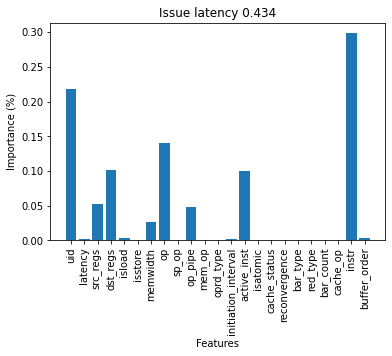

In [9]:
pyplot.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
columns= list(X_train)
pyplot.xlabel('Features')
pyplot.ylabel('Importance (%)')
pyplot.title('Issue latency %.3f'% gbr.score(X_test, y_test))
pyplot.xticks([i for i in range(0,inp.shape[1])],columns)
pyplot.xticks(rotation=90)
pyplot.show()

# Execution model

In [10]:
output= df[['execution_lat']]
inp= df.drop(['issue_lat','execution_lat','fetch_lat'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(inp, output, random_state=42, test_size=0.1)
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(X_train, y_train)

/Users/santosh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(learning_rate=0.01, min_samples_split=5,
                          n_estimators=1000)

In [11]:
# Print Coefficient of determination R^2
mse = mean_squared_error(y_test, gbr.predict(X_test))
print("MSE error: %.3f "%mse)
print("Model Accuracy: %.3f" % gbr.score(X_test, y_test))
feature_importance = gbr.feature_importances_

MSE error: 662.409 
Model Accuracy: 0.714


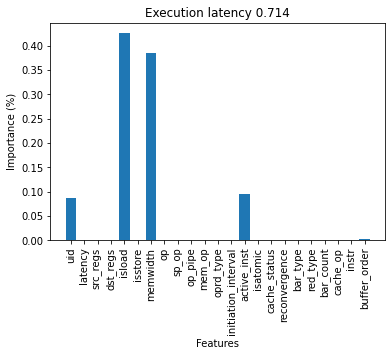

In [12]:
pyplot.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
columns= list(X_train)
pyplot.xlabel('Features')
pyplot.ylabel('Importance (%)')
pyplot.title('Execution latency %.3f'% gbr.score(X_test, y_test))
pyplot.xticks([i for i in range(0,inp.shape[1])],columns)
pyplot.xticks(rotation=90)
pyplot.show()

In [13]:
X_train

,uid,latency,src_regs,dst_regs,isload,isstore,memwidth,op,sp_op,op_pipe,...,active_inst,isatomic,cache_status,reconvergence,bar_type,red_type,bar_count,cache_op,instr,buffer_order
58,59,4,2,1,0,0,0,6,0,3,...,1,0,0,-1,-1,-1,-1,0,7,1
1167,1168,1,1,1,1,0,4,8,0,6,...,0,0,0,-1,-1,-1,-1,1,11,0
1216,1217,4,2,1,0,0,0,6,0,3,...,32,0,0,-1,-1,-1,-1,0,9,1
643,644,4,2,0,0,0,0,6,0,3,...,10,0,0,-1,-1,-1,-1,0,10,0
1068,1069,4,2,1,0,0,0,6,0,3,...,0,0,0,-1,-1,-1,-1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,1045,4,2,1,0,0,0,6,0,3,...,2,0,0,-1,-1,-1,-1,0,2,1
1095,1096,4,2,1,0,0,0,6,0,3,...,0,0,0,-1,-1,-1,-1,0,3,0
1130,1131,4,2,1,0,0,0,6,0,3,...,1,0,0,-1,-1,-1,-1,0,2,1
860,861,4,0,0,0,0,0,100,0,7,...,17,0,0,-1,-1,-1,-1,0,0,1


# Training with FC